In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col = 0 )

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Quickly check to see the size of our DF, both rows and columns
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [5]:
# your code here
#look at the types of data in the dataframe

df.isnull().sum()

_STATE          0
FMONTH          0
IDATE           0
IMONTH          0
IDAY            0
            ...  
_RFSEAT2        0
_RFSEAT3        0
_FLSHOT6    22334
_PNEUMO2    22334
_AIDTST3     3773
Length: 358, dtype: int64

Now check to see how large our subset df.

In [6]:
# your code here

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [7]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [8]:
#your code here
#create a list of columns that don't have any values


list_of_dropped_columns = []
for col in df.columns:
    if df[col].isna().sum() == len(df):
        list_of_dropped_columns.append(col)
    
    

In [9]:
clean_df = df.drop(columns=list_of_dropped_columns)

In [10]:
#find out how many 'not sures' -77 or 'no answers' 99 are in the dataset
drop_list = []

for i in clean_df['PHYSHLTH']:
    if i == 99 or i == 77:
        drop_list.append(i)
drop_list

[77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 99.0,
 99.0,
 99.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 99.0,
 99.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 77.0,
 77.0,
 99.0,
 99.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,

In [11]:
len(drop_list)

798

In [12]:
#remove thoses from the dataset


clean_df.drop(clean_df[clean_df['PHYSHLTH'] == 77 ].index , inplace=True)

In [13]:

clean_df.drop(clean_df[clean_df['PHYSHLTH'] == 99 ].index , inplace=True)

In [14]:
clean_df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


In [62]:
## 2. Generate the descriptive statistics

#Now that our target variable is cleaned up lets calculate the descriptive statistics, 
#generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

state_phyh['PHYSHLTH']=state_phyh['PHYSHLTH'].apply(lambda x: 0 if x==88 else x)

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
# #channge value labels for states to make it easier to read
# state_phyh['_STATE'] = state_phyh['_STATE'].map({9.0:'Connecticut',34.0:'New Jersey'})
state_phyh['_STATE'] = state_phyh['_STATE'].apply(lambda x: 'Connecticut' if x == 9.0 else x)

state_phyh['_STATE'] = state_phyh['_STATE'].apply(lambda x: 'New Jersey' if x == 34.0 else x)

state_phyh['_STATE'] = state_phyh['_STATE'].apply(lambda x: 'New York' if x == 36.0 else x)

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [231]:
pd.merge(['s1','s2'] )

TypeError: merge() missing 1 required positional argument: 'right'

In [213]:
state_phyh

,index,_STATE,PHYSHLTH
0,49938,Connecticut,0.0
1,49939,Connecticut,0.0
2,49940,Connecticut,2.0
3,49941,Connecticut,0.0
4,49942,Connecticut,0.0
...,...,...,...
33742,303774,New York,0.0
33743,303775,New York,0.0
33744,303776,New York,6.0
33745,303777,New York,0.0


In [64]:
state_phyh['PHYSHLTH'].value_counts()

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [117]:
state_phyh.groupby('_STATE')['PHYSHLTH'].mean().reset_index()

,_STATE,PHYSHLTH
0,Connecticut,3.688562
1,New Jersey,4.380957
2,New York,4.148030


In [85]:
# descriptive statistics
state_phyh.groupby('_STATE')['PHYSHLTH'].mean().reset_index()

,_STATE,PHYSHLTH
0,9.0,3.688562
1,34.0,4.380957
2,36.0,4.148030


[(9.0, 49938    88.0
  49939    88.0
  49940     2.0
  49941    88.0
  49942    88.0
           ... 
  60521    88.0
  60522    88.0
  60523    30.0
  60524    88.0
  60525    14.0
  Name: PHYSHLTH, Length: 10413, dtype: float64), (34.0, 273284    88.0
  273285     4.0
  273286    88.0
  273287    88.0
  273288    88.0
            ... 
  284987     4.0
  284988    88.0
  284989    88.0
  284990    88.0
  284991    88.0
  Name: PHYSHLTH, Length: 11458, dtype: float64), (36.0, 291530     3.0
  291531    24.0
  291532    88.0
  291533     7.0
  291534    88.0
            ... 
  303774    88.0
  303775    88.0
  303776     6.0
  303777    88.0
  303778    88.0
  Name: PHYSHLTH, Length: 11876, dtype: float64)]

In [ ]:
# graphic showing those descriptive stats

In [202]:
# graphic showing the distribution of data
state_phyh_reset

,_STATE,PHYSHLTH
0,Connecticut,3.688562
1,New Jersey,4.380957
2,New York,4.148030


## 3. Generate a graphic that compares the average number of sick days for each state. 

In [119]:
# code to calculate the average number of sick days by state

state_phyh_reset = state_phyh.groupby('_STATE')['PHYSHLTH'].mean().reset_index()


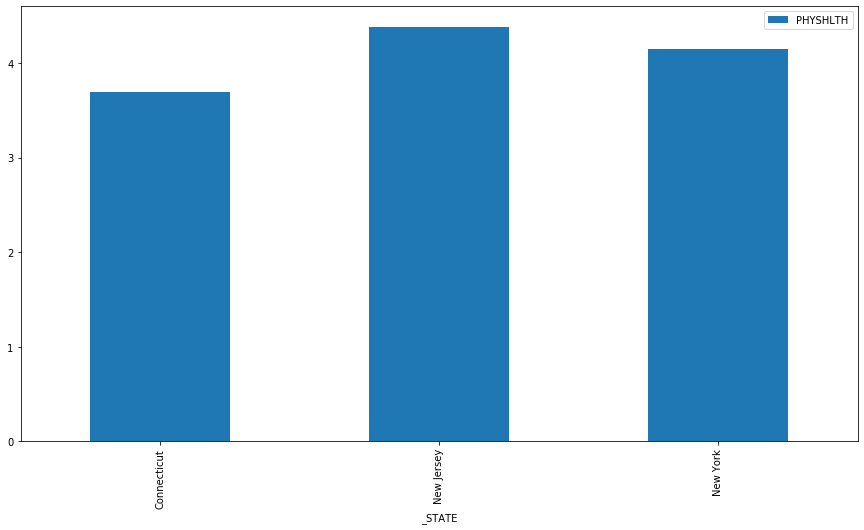

In [150]:
state_phyh_reset.plot(kind='bar',x='_STATE', figsize=(15,8), )
plt.show()

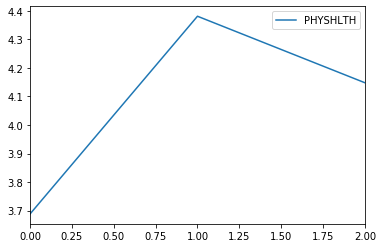

In [ ]:
# code to graph those averages using matplotlib

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [154]:
# rename month columns

clean_df['FMONTH'] = clean_df['FMONTH'].map({5.0: 'May', 1.0: 'January', 2.0: 'February', 3.0: 'March', 
                        4.0: 'April', 6.0: 'June', 7.0: 'July', 8.0: 'August', 9.0: 'September', 
                        10.0: 'October', 11.0: 'November', 12.0: 'December'})

In [185]:
#rename columns for chronic illnesses
clean_df = clean_df.rename(columns=({'CVDINFR4':'Heart Attack', 'CVDCRHD4':'Heart Disease', 'CVDSTRK3':'Stroke', 'ASTHMA3':'Had Asthma',
                                     'ASTHNOW':'Have Asthma Now',
                                    'CHCSCNCR':'Skin Cancer', 'CHCOCNCR':'Other Cancer', 'CHCCOPD1':'Pulmonary,emphysema,bronchitis',
                                    'HAVARTH3':'Arthritis', 'ADDEPEV2':'Depression', 'CHCKIDNY':'Kidney Disease', 'DIABETE3':'Diabetes'}))

In [188]:
#slice dataframe for chronic illnesses
chronic_illness = clean_df.loc[:, 'Heart Attack':'Diabetes']

In [263]:

list4=[]
for col in list(chronic_illness.columns):
    list4.append(chronic_illness[col].apply(lambda x: 'Yes' if x ==1.0 ('No' if x == 2.0 else x)))   
list4

SyntaxError: invalid syntax (<ipython-input-263-bfb49265aece>, line 3)

In [246]:
np.

AttributeError: 'DataFrame' object has no attribute 'value_counts'

Index(['Heart Attack', 'Heart Disease', 'Stroke', 'Asthma', 'Have Asthma Now',
       'Skin Cancer', 'Other Cancer', 'Pulmonary,emphysema,bronchitis',
       'Arthritis', 'Depression', 'Kidney Disease', 'Diabetes'],
      dtype='object')

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [ ]:
# code to calculate averages per state

In [ ]:
# create graphic to compare chronically sick by state

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  